In [1]:
import copy
import numpy as np
import os
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [3]:
study_keys = pickle.load(open('../data/study_keys.pkl', 'rb'))

In [4]:
df = pd.read_csv('../data/data_to_model.csv', index_col='Unnamed: 0')
df

,Participant_ID,Group,Age,Gender,Nationality,Native_Language,Education,Writing_Proficiency,Daily_Email_Frequency,BFI_Agreeableness,...,NASA_Frustration,Treatment,Task,PP_QC,EDA_QC,BR_QC,Chest_HR_QC,Wrist_HR_QC,RR_QC,Is_Stressed
0,T003,CH,23.0,2,1.0,1.0,2.0,7.0,6.0,40.0,...,5.0,RB,Not Applicable,0.003544,0.311345,12.2,83.0,85.78,705.0,1
1,T003,CH,23.0,2,1.0,1.0,2.0,7.0,6.0,40.0,...,5.0,RB,Not Applicable,0.003543,0.310063,12.8,82.0,85.80,731.0,1
2,T003,CH,23.0,2,1.0,1.0,2.0,7.0,6.0,40.0,...,5.0,RB,Not Applicable,0.003541,0.309743,12.8,81.0,85.83,704.0,1
3,T003,CH,23.0,2,1.0,1.0,2.0,7.0,6.0,40.0,...,5.0,RB,Not Applicable,0.003539,0.309743,13.3,79.0,85.83,719.0,1
4,T003,CH,23.0,2,1.0,1.0,2.0,7.0,6.0,40.0,...,5.0,RB,Not Applicable,0.003537,0.309743,13.3,82.0,85.83,733.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149090,T176,BL,18.0,2,1.0,1.0,2.0,7.0,7.0,39.0,...,2.0,PR,Not Applicable,0.007014,0.145388,17.0,91.0,111.60,653.0,0
149091,T176,BL,18.0,2,1.0,1.0,2.0,7.0,7.0,39.0,...,2.0,PR,Not Applicable,0.007089,0.147629,17.0,91.0,112.38,637.0,0
149092,T176,BL,18.0,2,1.0,1.0,2.0,7.0,7.0,39.0,...,2.0,PR,Not Applicable,0.007165,0.147309,17.0,90.0,113.22,639.0,0
149093,T176,BL,18.0,2,1.0,1.0,2.0,7.0,7.0,39.0,...,2.0,PR,Not Applicable,0.007251,0.147629,17.0,86.0,114.07,1233.0,0


In [5]:
features = [ft for ft in list(df.columns) if ft not in ('Participant_ID', 'EDA_QC', 'Wrist_HR_QC')]
df_features = df.join(pd.get_dummies(df[['Treatment', 'Task']])).drop(columns=['Treatment', 'Task'])

In [6]:
df_features.shape

(37412, 38)

In [7]:
df_features

,Participant_ID,Group,Age,Gender,Nationality,Native_Language,Education,Writing_Proficiency,Daily_Email_Frequency,BFI_Agreeableness,...,RR_QC,Is_Stressed,Treatment_DT,Treatment_PM,Treatment_PR,Treatment_RB,Treatment_ST,Task_Email,Task_Not Applicable,Task_Report
0,T003,CH,23.0,2,1.0,1.0,2.0,7.0,6.0,40.0,...,705.0,1,0,0,0,1,0,0,1,0
1,T003,CH,23.0,2,1.0,1.0,2.0,7.0,6.0,40.0,...,731.0,1,0,0,0,1,0,0,1,0
2,T003,CH,23.0,2,1.0,1.0,2.0,7.0,6.0,40.0,...,704.0,1,0,0,0,1,0,0,1,0
3,T003,CH,23.0,2,1.0,1.0,2.0,7.0,6.0,40.0,...,719.0,1,0,0,0,1,0,0,1,0
4,T003,CH,23.0,2,1.0,1.0,2.0,7.0,6.0,40.0,...,733.0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149090,T176,BL,18.0,2,1.0,1.0,2.0,7.0,7.0,39.0,...,653.0,0,0,0,1,0,0,0,1,0
149091,T176,BL,18.0,2,1.0,1.0,2.0,7.0,7.0,39.0,...,637.0,0,0,0,1,0,0,0,1,0
149092,T176,BL,18.0,2,1.0,1.0,2.0,7.0,7.0,39.0,...,639.0,0,0,0,1,0,0,0,1,0
149093,T176,BL,18.0,2,1.0,1.0,2.0,7.0,7.0,39.0,...,1233.0,0,0,0,1,0,0,0,1,0


In [8]:
weights = dict(df_features.Is_Stressed.value_counts())
weights

{0: 20311, 1: 17101}

In [9]:
df_features.shape

(37412, 38)

In [10]:
model_features = pickle.load(open('../data/model_features.pkl', 'rb'))

In [11]:
X = df_features[model_features]
y = df_features['Is_Stressed']


X_train, X_test, label_train, label_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, label_train, label_val = train_test_split(X_train, label_train, test_size=0.2, random_state=1)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)
X_val_scaled = scaler.transform(X_val.values)

In [12]:
models = {
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(penalty='none', class_weight=weights),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(), 
    'Random Forest': RandomForestClassifier(n_estimators=1),
    'SVM (Support Vector Machine)': SVC(probability=True)
}

train_subset = {'X': X_train, 'y': label_train}
test_subset = {'X': X_test, 'y': label_test}
val_subset = {'X': X_val, 'y': label_val}

In [47]:
metrics = {'precision_macro': 'Precision', 
           'recall_macro': 'Recall', 
           'f1_macro': 'F1 score'}


for model_name in models.keys():   
    if model_name == 'Logistic Regression':
        train = {'X': X_train_scaled, 'y': label_train}
        val = {'X': X_val_scaled, 'y': label_val}    
    else:
        train = train_subset
        val = val_subset
    
    model = models[model_name].fit(**train)
    
    mean_accuracy = np.mean(cross_val_score(model, **val))
    metrics_scores = cross_validate(model, **val, scoring=list(metrics.keys()))
    preds = model.predict(val['X'])
    
    print('\nModel - {}\nAccuracy:\n\t{}'.format(model_name.upper(), mean_accuracy))
    
    for metric in metrics.keys():
        print('{}: '.format(metrics[metric]))
        print('\t', np.mean(metrics_scores['test_' + metric]))
    
    models[model_name] = model


Model - K NEAREST NEIGHBORS
Accuracy:
	0.8605099281314026
Precision: 
	 0.8600963186885304
Recall: 
	 0.8594237716434151
F1 score: 
	 0.8597100424835782

Model - LOGISTIC REGRESSION
Accuracy:
	0.7041464261655809
Precision: 
	 0.7029685032299817
Recall: 
	 0.7010423600180093
F1 score: 
	 0.7015120031859745

Model - GAUSSIAN NAIVE BAYES
Accuracy:
	0.6764122325848009
Precision: 
	 0.6941187642967914
Recall: 
	 0.6631866620266247
F1 score: 
	 0.6572101936305568

Model - DECISION TREE
Accuracy:
	0.9981634665405863
Precision: 
	 0.9988631588626316
Recall: 
	 0.9987900776915277
F1 score: 
	 0.9988250664834529

Model - RANDOM FOREST
Accuracy:
	0.9724345644299953
Precision: 
	 0.969268045423887
Recall: 
	 0.9708155798628713
F1 score: 
	 0.9696775269900929

Model - SVM (SUPPORT VECTOR MACHINE)
Accuracy:
	0.6329785231024138
Precision: 
	 0.6362549800287917
Recall: 
	 0.6361343047079154
F1 score: 
	 0.6329256833161031


In [48]:
for model_name in ['Logistic Regression', 'K Nearest Neighbors', 'Random Forest']:   
    if model_name == 'Logistic Regression':
        train = {'X': X_train_scaled, 'y': label_train}
        val = {'X': X_val_scaled, 'y': label_val}    
    else:
        train = train_subset
        val = val_subset
    
    model = models[model_name]
    
    mean_accuracy = np.mean(cross_val_score(model, **val))
    metrics_scores = cross_validate(model, **val, scoring=list(metrics.keys()))
    preds = model.predict(val['X'])
    
    print('\nModel - {}\nAccuracy:\n\t{}'.format(model_name.upper(), mean_accuracy))
    
    for metric in metrics.keys():
        print('{}: '.format(metrics[metric]))
        print('\t', np.mean(metrics_scores['test_' + metric]))


Model - LOGISTIC REGRESSION
Accuracy:
	0.7041464261655809
Precision: 
	 0.7029685032299817
Recall: 
	 0.7010423600180093
F1 score: 
	 0.7015120031859745

Model - K NEAREST NEIGHBORS
Accuracy:
	0.8605099281314026
Precision: 
	 0.8600963186885304
Recall: 
	 0.8594237716434151
F1 score: 
	 0.8597100424835782

Model - RANDOM FOREST
Accuracy:
	0.972435122307717
Precision: 
	 0.9705019995232551
Recall: 
	 0.9721829709700955
F1 score: 
	 0.9710216393071519


In [57]:
def roc_and_auc(y_true, model_name, model, X_to_predict, positive_label):
    print('{}'.format(model_name.upper()))
    y_score = model.predict_proba(X_to_predict)[:, 1]
    
    FPR, TPR, thresholds = roc_curve(y_true, y_score, pos_label=positive_label)
    
    auc = roc_auc_score(y_true, y_score)
    
    plt.plot(FPR, TPR)
    plt.plot([0,1],[0,1])


    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])


    plt.xlabel('False Positive %')
    plt.ylabel('True Positive %')
    plt.title('{} ROC curve'.format(model_name));
    
    return plt.show(), print('\tROC AUC score for {}: {}\n\n\n'.format(model_name, auc));

LOGISTIC REGRESSION


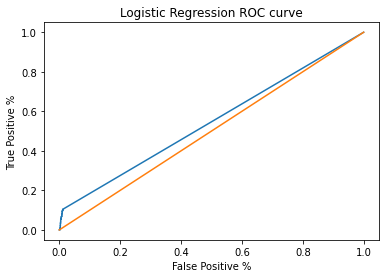

	ROC AUC score for Logistic Regression: 0.5463692471993412



K NEAREST NEIGHBORS


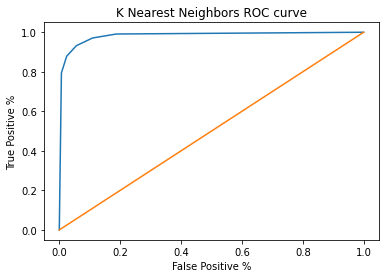

	ROC AUC score for K Nearest Neighbors: 0.9822601842987314



RANDOM FOREST


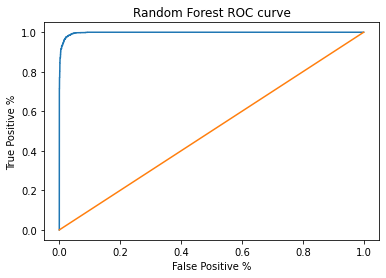

	ROC AUC score for Random Forest: 0.9978101563933955





In [60]:
for model_name in ['Logistic Regression', 'K Nearest Neighbors', 'Random Forest']:
    model = models[model_name]
    roc_and_auc(label_test, model_name, model, X_test, positive_label=1)

In [61]:
models['Random Forest'].set_params(n_estimators=2)

mean_accuracy = np.mean(cross_val_score(model, **val))
metrics_scores = cross_validate(model, **val, scoring=list(metrics.keys()))
preds = model.predict(val['X'])

print('\nModel - {}\nAccuracy:\n\t{}'.format(model_name.upper(), mean_accuracy))

for metric in metrics.keys():
    print('{}: '.format(metrics[metric]))
    print('\t', np.mean(metrics_scores['test_' + metric]))


Model - RANDOM FOREST
Accuracy:
	0.8800507110848909
Precision: 
	 0.8809721212153583
Recall: 
	 0.8745991416855956
F1 score: 
	 0.8732496306051141


In [62]:
models['Random Forest'].set_params(n_estimators=3)
models['Random Forest'].set_params(max_leaf_nodes=None)
models['Random Forest'].set_params(n_estimators=50)
models['Random Forest'].set_params(max_depth=5)

mean_accuracy = np.mean(cross_val_score(model, **val))
metrics_scores = cross_validate(model, **val, scoring=list(metrics.keys()))
preds = model.predict(val['X'])

print('\nModel - {}\nAccuracy:\n\t{}'.format(model_name.upper(), mean_accuracy))

for metric in metrics.keys():
    print('{}: '.format(metrics[metric]))
    print('\t', np.mean(metrics_scores['test_' + metric]))


Model - RANDOM FOREST
Accuracy:
	0.9680910679592692
Precision: 
	 0.9662158124523555
Recall: 
	 0.9676778461510992
F1 score: 
	 0.9666560280596442


RANDOM FOREST


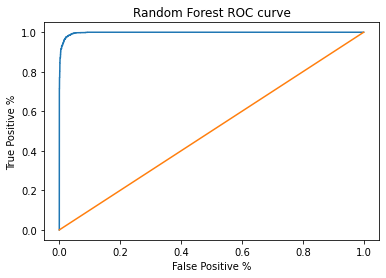

	ROC AUC score for Random Forest: 0.9978101563933955





(None, None)

In [65]:
roc_and_auc(label_test, 'Random Forest', models['Random Forest'], X_test, positive_label=1)

In [51]:
mean_accuracy = np.mean(cross_val_score(model, **test_subset))
metrics_scores = cross_validate(model, **test_subset, scoring=list(metrics.keys()))
preds = model.predict(test_subset['X'])

print('\nModel - {}\nAccuracy:\n\t{}'.format(model_name.upper(), mean_accuracy))

for metric in metrics.keys():
    print('{}: '.format(metrics[metric]))
    print('\t', np.mean(metrics_scores['test_' + metric]))


Model - RANDOM FOREST
Accuracy:
	0.9696649091409201
Precision: 
	 0.9744902520017575
Recall: 
	 0.9762181584274403
F1 score: 
	 0.9750687628589085


In [89]:
for model_name in ['K Nearest Neighbors', 'Random Forest']:
    model = models[model_name]
    mean_accuracy = np.mean(cross_val_score(model, **test_subset))
    metrics_scores = cross_validate(model, **test_subset, scoring=list(metrics.keys()))
    preds = model.predict(test_subset['X'])
    
    print('\nModel - {}\nAccuracy:\n\t{}'.format(model_name.upper(), mean_accuracy))
    
    for metric in metrics.keys():
        print('{}: '.format(metrics[metric]))
        print('\t', np.mean(metrics_scores['test_' + metric]))


Model - K NEAREST NEIGHBORS
Accuracy:
	0.8751827183779323
Precision: 
	 0.874704372108462
Recall: 
	 0.8742549300417034
F1 score: 
	 0.8744521066062809

Model - RANDOM FOREST
Accuracy:
	0.9696646412254099
Precision: 
	 0.9717276128568194
Recall: 
	 0.9735029971567759
F1 score: 
	 0.9722569104529108


In [90]:
df_features['Prediction'] = models['K Nearest Neighbors'].predict(X)
df_features['Is_Pred_Correct'] = np.where(df_features['Prediction'] == df_features['Is_Stressed'], 'Correct_Pred', 'Wrong_Pred')

df_features.to_csv('../data/data_predictions.csv')

In [121]:
models['K Nearest Neighbors'].

'auto'

In [119]:
models['Random Forest'].feature_importances_

array([0.2120127 , 0.22220222, 0.1590386 , 0.15312078, 0.03548088,
       0.05145919, 0.1221693 , 0.01419629, 0.00221806, 0.00682844,
       0.00127007, 0.00777683, 0.0017147 , 0.00699942, 0.00351252])

In [103]:
df_features.columns

Index(['Participant_ID', 'Group', 'Age', 'Gender', 'Nationality',
       'Native_Language', 'Education', 'Writing_Proficiency',
       'Daily_Email_Frequency', 'BFI_Agreeableness', 'BFI_Conscientiousness',
       'BFI_Extraversion', 'BFI_Neuroticism', 'BFI_Openness',
       'ERQ_Cognitive_Reappraisal', 'ERQ_Expressive_Suppression',
       'Perceived_Stress_Scale', 'NASA_Mental_Demand', 'NASA_Physical_Demand',
       'NASA_Temporal_Demand', 'NASA_Performance', 'NASA_Effort',
       'NASA_Frustration', 'PP_QC', 'EDA_QC', 'BR_QC', 'Chest_HR_QC',
       'Wrist_HR_QC', 'RR_QC', 'Is_Stressed', 'Treatment_DT', 'Treatment_PM',
       'Treatment_PR', 'Treatment_RB', 'Treatment_ST', 'Task_Email',
       'Task_Not Applicable', 'Task_Report', 'Prediction', 'Is_Pred_Correct'],
      dtype='object')

In [108]:
df

,Participant_ID,Group,Age,Gender,Nationality,Native_Language,Education,Writing_Proficiency,Daily_Email_Frequency,BFI_Agreeableness,...,NASA_Frustration,Treatment,Task,PP_QC,EDA_QC,BR_QC,Chest_HR_QC,Wrist_HR_QC,RR_QC,Is_Stressed
0,T003,CH,23.0,2,1.0,1.0,2.0,7.0,6.0,40.0,...,5.0,RB,Not Applicable,0.003544,0.311345,12.2,83.0,85.78,705.0,1
1,T003,CH,23.0,2,1.0,1.0,2.0,7.0,6.0,40.0,...,5.0,RB,Not Applicable,0.003543,0.310063,12.8,82.0,85.80,731.0,1
2,T003,CH,23.0,2,1.0,1.0,2.0,7.0,6.0,40.0,...,5.0,RB,Not Applicable,0.003541,0.309743,12.8,81.0,85.83,704.0,1
3,T003,CH,23.0,2,1.0,1.0,2.0,7.0,6.0,40.0,...,5.0,RB,Not Applicable,0.003539,0.309743,13.3,79.0,85.83,719.0,1
4,T003,CH,23.0,2,1.0,1.0,2.0,7.0,6.0,40.0,...,5.0,RB,Not Applicable,0.003537,0.309743,13.3,82.0,85.83,733.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149090,T176,BL,18.0,2,1.0,1.0,2.0,7.0,7.0,39.0,...,2.0,PR,Not Applicable,0.007014,0.145388,17.0,91.0,111.60,653.0,0
149091,T176,BL,18.0,2,1.0,1.0,2.0,7.0,7.0,39.0,...,2.0,PR,Not Applicable,0.007089,0.147629,17.0,91.0,112.38,637.0,0
149092,T176,BL,18.0,2,1.0,1.0,2.0,7.0,7.0,39.0,...,2.0,PR,Not Applicable,0.007165,0.147309,17.0,90.0,113.22,639.0,0
149093,T176,BL,18.0,2,1.0,1.0,2.0,7.0,7.0,39.0,...,2.0,PR,Not Applicable,0.007251,0.147629,17.0,86.0,114.07,1233.0,0


In [111]:
df_features.merge(df[['Task', 'Treatment']], left_index=True, right_index=True).to_csv('../data/data_predictions.csv')